In [1]:
from collections import defaultdict, Counter
import csv
import nltk

from analysis import clean_text

STOPWORDS = set(nltk.corpus.stopwords.words('french'))
more_stopwords = {'les', 'a', 'plus', 'tous', 'tout', 'il'}
STOPWORDS |= more_stopwords

In [2]:
with open('../data/raw/dataset_poll_fr.csv') as f:
    reader = csv.DictReader(f)
    rows = list(reader)

In [3]:
suggestions = [r['reponse'] for r in rows if r['theme'] == 'Contribution libre']
len(suggestions)

77

In [4]:
lines = sum((clean_text.get_clean_suggestion(sugg) for sugg in suggestions), [])

In [5]:
word_count = Counter()
sentences_by_word = defaultdict(set)
for i, line in enumerate(lines):
    for word in line.split():
        word = word.lower()
        if word not in STOPWORDS:
            word_count[word] += 1
            sentences_by_word[word].add(i)

In [7]:
words = sorted(word_count, key=lambda w: -word_count[w])
for w in words[:40]:
    print(w)

isf
france
faut
sans
car
être
revenu
mettre
si
ils
non
aide
pays
doit
personnes
pouvoir
impôts
état
faire
payer
trop
ans
comme
pourquoi
vie
aider
retraite
aussi
rendre
droit
peuple
toutes
bien
afin
moins
enfants
ça
salaire
travail
5


In [8]:
for i in sentences_by_word['retraite']:
    print(lines[i])

Allocation adulte handicapés et que cette allocation puisse compter pour la retraite L AAH ne se déclare pas mais elle ne compte pas dans les cotisations pour la retraite c est un vrai handicap car du coup ma retraite sera très basse
départ à la retraite pour les carrières longues
Les retraites comment un retraite ayant travaillé toute une vie peut il être rémunéré en dessous du SMIC 10 ans de retraite 1 euro d augmentation par mois on se moque de qui
retraite chomage je pense que l on devrais diviser ses taxes et en mettre une pour notre propre avenir 
 Afin de renouveler la classe politique et par souci d égalité la retraite à 62 ans pour tous les élus
 Mettre la retraite a 60 ans pour tous et que chaque côtoyer ne se retrouve pas avec 1000 par mois
Exemple si on est muet pas besoin de 2 h de communication les remplacer par un service adapté Exonération de la redevance télé car la télé est le loisir du pauvre y compris dans les hôpitaux et maisons de retraite
 Pour réduire le train d

In [15]:
tmp_lines = [lines[i] for i in sentences_by_word['retraite']]
txt = " ".join(t for line in tmp_lines for t in line.split() if t not in STOPWORDS)

In [16]:
txt

'Allocation adulte handicapés cette allocation puisse compter retraite L AAH déclare compte cotisations retraite vrai handicap car coup retraite très basse départ retraite carrières longues Les retraites comment retraite travaillé toute vie peut être rémunéré dessous SMIC 10 ans retraite 1 euro augmentation mois moque retraite chomage pense devrais diviser taxes mettre propre avenir Afin renouveler classe politique souci égalité retraite 62 ans élus Mettre retraite 60 ans chaque côtoyer retrouve 1000 mois Exemple si muet besoin 2 h communication remplacer service adapté Exonération redevance télé car télé loisir pauvre compris hôpitaux maisons retraite Pour réduire train vie état suppression certains avantages transports gratuits véhicules chauffeur retraite anciens présidents non cumul salaires élus sauf maires petites moyennes communes travaillent Au sujet rémunérations mandats crois elles exagérées rapport salaire retraite moyenne population'

In [17]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(txt)

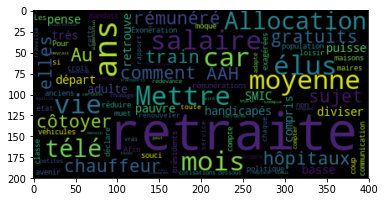

In [19]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')

In [23]:
def explore_suggestion_with_word(word):
    lines_with_word = [lines[i] for i in sentences_by_word[word]]
    print("-- Printing suggestions related to %s" % word)
    for line in lines_with_word:
        print(line)
    txt = " ".join(t for line in lines_with_word for t in line.split() if t.lower() not in STOPWORDS and t.lower() != word)
    wordcloud = WordCloud().generate(txt)
    plt.imshow(wordcloud, interpolation='bilinear')

-- Printing suggestions related to isf
Pourquoi il fallait supprimer l ISF
1 La suppression de l ISF sur le capital tout comme la Flat Tax de 30 sur les revenus du capital avait pour objectif de mettre la France au niveau de la concurrence fiscale des autres pays européens
 L ISF n existe nulle part dans le monde et dans aucun pays des 27 membres de l Union européenne à l exception de l Espagne où il a déjà été supprimé puis rétabli 
En Suède Ingvar Kamprad le PDG d IKEA s était expatrié à Londres à cause de l ISF
2 Contrairement aux inexactitudes qui sont répétées en permanence la suppression de l ISF n a pas profité aux très riches 
 Ils avaient des Holdings pour ne jamais payer l ISF
Cette suppression a profité aux petits millionnaires qui ont pour beaucoup d entre eux un revenu de classe moyenne supérieure et composaient la majorité des contribuables ISF
3 L ISF n est pas basé sur le revenu mais sur le patrimoine détenu
 On peut gagner 800 euros par mois et devoir payer l ISF
 Si o

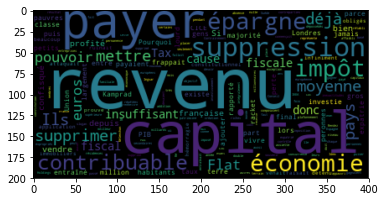

In [60]:
explore_suggestion_with_word('isf')

-- Printing suggestions related to revenu
 Leur revenu était confisqué avec l addition de l impôt sur le revenu et de l ISF
RIC référendum sur l annulation de la dette revenu universel nationalisation des banques et entreprises de services publics création de médias nationaux au service d intérêts publics accomplissant un réel travail d investigation et de journalisme proposant à l information une réel divergence d opinions au débats enlever tout les radars péages et nationaliser nos axes autoroutiers fin d utilisation de toutes les caméras de surveillances qui filmes la voix publique les allumer que sur autorisation pour une utilisation utile et éphémère en fonction d une situation
000 euros d ISF par an même s il n avait que des résidences secondaires et un revenu insuffisant pour payer l ISF
 Ils sont passés de 100 d impôts voire bien plus à 75 de leur revenu confisqué
 Il ne leur restait que 25 de leur revenu
6 Les riches contribuent déjà plus que n importe qui avec l impôt sur le 

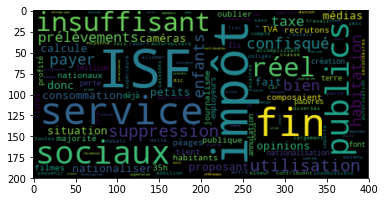

In [61]:
explore_suggestion_with_word('revenu')

In [29]:
import csv
with open('../data/raw/FEEL.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    token_feel = {r['word']: r for r in reader}

In [39]:
import csv
with open('../data/raw/FEEL.csv') as f:
    reader = csv.DictReader(f, delimiter=';')
    print({r['polarity'] for r in reader})

{'negative', 'positive'}


In [55]:
from collections import Counter

def line_sentiment(line):
    sentiment = Counter()
    fields = ['joy', 'fear', 'sadness', 'anger', 'surprise','disgust']
    for token in line.split():
        token = token.lower()
        if token in token_feel:
            row = token_feel[token]
            this_sentiment = Counter({f: int(row[f]) for f in fields})
            this_sentiment['polarity'] = 2 * (row['polarity'] == 'positive') - 1
            try:
                sentiment += this_sentiment
            except Exception:
                print(sentiment)
                print(this_sentiment)
                raise
    return sentiment

In [57]:
for line in tmp_lines:
    print(" --- Analysing line -- ")
    print(line)
    print(line_sentiment(line))

 --- Analysing line -- 
Allocation adulte handicapés et que cette allocation puisse compter pour la retraite L AAH ne se déclare pas mais elle ne compte pas dans les cotisations pour la retraite c est un vrai handicap car du coup ma retraite sera très basse
Counter({'fear': 5, 'sadness': 5, 'anger': 2})
 --- Analysing line -- 
départ à la retraite pour les carrières longues
Counter({'fear': 1, 'sadness': 1})
 --- Analysing line -- 
Les retraites comment un retraite ayant travaillé toute une vie peut il être rémunéré en dessous du SMIC 10 ans de retraite 1 euro d augmentation par mois on se moque de qui
Counter({'fear': 2, 'sadness': 2, 'joy': 1})
 --- Analysing line -- 
retraite chomage je pense que l on devrais diviser ses taxes et en mettre une pour notre propre avenir 
Counter({'fear': 1, 'sadness': 1})
 --- Analysing line -- 
 Afin de renouveler la classe politique et par souci d égalité la retraite à 62 ans pour tous les élus
Counter({'fear': 2, 'sadness': 2, 'disgust': 1, 'anger'

In [43]:
'allocation' in token_feel

True